# RANDOM FOREST CLASSIFIER ALGORITHEM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('ICU.csv')

del df['ID']
del df['gendera']
del df['group']

df.head()

,outcome,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,37.588179,0,0,0,1,1,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,NaN,0,0,0,0,1,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,26.572634,0,0,0,0,1,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,83.264629,0,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,31.824842,1,0,0,0,1,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [4]:
df.shape

(1177, 48)

In [5]:
df=df.dropna()

In [6]:
df.columns

Index(['outcome', 'age', 'BMI', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [7]:
df.tail()

,outcome,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1088,0.0,83,20.347657,1,1,0,0,0,0,0,...,137.800000,7.925000,102.400000,16.600000,2.250000,7.273333,23.000000,3.550,48.333333,55
1090,0.0,37,26.638051,0,0,0,0,0,0,0,...,135.666667,8.400000,100.333333,13.333333,2.050000,7.370000,26.333333,3.775,29.000000,20
1091,0.0,61,29.836962,1,0,0,1,0,0,1,...,135.444444,8.571429,99.444444,15.888889,1.900000,7.368125,24.333333,4.150,43.000000,20
1092,0.0,71,32.804298,1,0,0,1,0,1,0,...,141.823529,8.500000,101.470588,12.066667,2.005882,7.385806,32.933333,4.160,42.870968,55
1094,0.0,37,26.255155,0,0,0,0,0,0,0,...,126.230769,8.000000,92.923077,16.083333,2.141667,7.430000,21.666667,4.200,21.000000,15


In [8]:
x1 = df.drop(labels='outcome', axis=1)
y1 = df.loc[:,'outcome']

In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0.0: 363, 1.0: 65})
OVER SAMPLING DATA COUNT  :  Counter({0.0: 363, 1.0: 363})


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  580
NUMBER OF TEST DATASET      :  146
TOTAL NUMBER OF DATASET    :  726


In [11]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  580
NUMBER OF TEST DATASET      :  146
TOTAL NUMBER OF DATASET    :  726


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
predicted = RFC.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[72  1]
 [ 0 73]]


In [16]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RFC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [99.31506849 97.93103448 95.86206897 95.86206897 97.93103448]


In [17]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 99.31506849315068


In [18]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 0.684931506849315


In [19]:
from sklearn.metrics import precision_score
P = precision_score(y_test,predicted)
print("THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS :",P*100)

THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS : 98.64864864864865


In [20]:
from sklearn.metrics import recall_score
R = recall_score(y_test,predicted)
print("THE RECALL SCORE OF RANDOM FOREST CLASSIFIER IS :",R*100)

THE RECALL SCORE OF RANDOM FOREST CLASSIFIER IS : 100.0


In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted)
print("THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS :",f1*100)

THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS : 99.31972789115648


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[72  1]
 [ 0 73]]


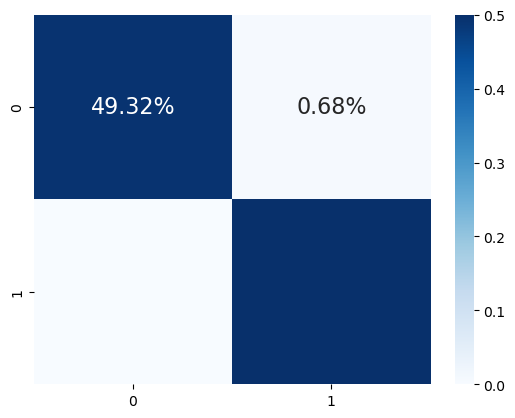

In [22]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

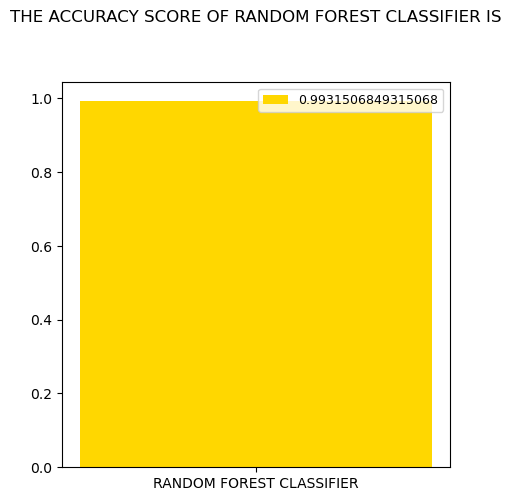

In [23]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="RANDOM FOREST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("gold"))
    plt.title("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [24]:
import joblib
joblib.dump(RFC, 'ICU.pkl')

['ICU.pkl']